# Исследовательский анализ данных для сервиса по подбору психотерапевтов
## Введение
### Цель проекта
У бизнеса есть предположение, что алгоритм подбора терапевтов можно улучшить. Мне поставили задачу - выявить инсайты в поведении пользоватлей при выборе психологов на сайте,в первую очередь проверить степень влияния feature_1, feature_2 и feature_3 на выбор психолога.
### Описание данных

**! Для соблюдения NDA данные были анонимизированы: названия признаков и значения зашифрованы, но логика анализа сохранена полностью.**

Для анализа данных используем данные о сессиях выбора терапевтов с 16.06.2025 по 26.06.2025. Для исследования используются только данные пользовтателей, которые ищут терапевта для личной терапии онлайн, так как они составляют наибольшее количество запросов.
Данные содержат 1 датасет со следующей структурой:
* survey_result_id	Уникальный номер анкеты
* psychologist_id	ID психолога, который мог бы быть в выдаче финальной
* was_booked	Привела ли эта анкета к букингу
* was_paid	Привела ли эта анкета к букингу, который был оплачен
* this_psy	Этого психолога оплатили в этоге
* metric_1	метрика 1
* feature_1	показатель 1
* feature_2	показатель 2
* feature_3	показатель 3
* metric_2	метрика 2
* c4_value	% клиентов психолога, которые дошли до 4ой сессии
* clients	Кол-во новых клиентов психолога в этом месяце
* s3	Нормированные баллы по 
* s7	Нормированные баллы по 
* s8	Нормированные баллы по 
* smat	Нормированные баллы по 
* sc4	Нормированные баллы по 
* pen	Штрафной коэф связанный с метрикой Clients
* alg1	ручной результат текушего алгоритма
* alg2	ручной результат текушего алгоритма, но сильно подняты веса слотов и C4
* alg3	ручной результат текушего алгоритма, но подняты веса слотов и C4
* r1	место психолога в
* r2	место психолога в
* r3	место психолога в
* survey_result_id_1	Уникальный номер анкеты (дубль)
* slug	тип анкеты (личная, семейная, детская терапия)
* first_time	Был ли ты раньше у психолога
* client_sex	Пол клиента
* age	Возраст клиента
* reported_problems	Проблемы, которые клиент отметил
* form_of_work	Онлайн-оффлайн
* city	Если оффлайн, то какой город хочет клиент
* sex	Пол психолога
* price_category	Ценовая категория
* childs_name	Имя ребенка, если детская терапия (хз зачем это тут)
* family_member	с кем ты придешь на семейку (хз зачем это тут)
* rr1	только топ 12 место психолога в
* rr2	только топ 12 место психолога в
* rr3	только топ 12 место психолога в
* survey_started время начало выбора
*  session_time время забронированной сессии
* count_of_problems  количество запросов
* price стоимость 1 сессии

 
**Заметки:**
1. slag=myself В датает входят только данные о пользователях, обращающихся для личной терапии онлайн
Влияние цены
2. Поле final score считается по алгоритму 1 для данного датасета

Сделать:
+- Посмотреть гэп по ценовым категориям и как выбирают
- +по с14_value построить распределение выбранных
+ +мэтч скор для тех, у кого 4 запроса




## Загрузка данных и знакомство с ними

In [1]:
# импорт библиотек, загрузка данных
from matplotlib import pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import pandas as pd
from scipy import stats as st
import numpy as np


In [2]:
try:
    orders = pd.read_csv(r'C:\Users\workp\code\anonymized_data.csv')
except:
    orders = pd.read_csv(r'C:\Users\workp\code\anonymized_data.csv')
display(orders.head(200))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,survey_started,survey_result_id,psychologist_id,was_booked,was_paid,this_psy,session_time,metric_1,feature_1,feature_2,...,price_category,childs_name,family_member,count_of_problems,psychologist_id.1,price,rr1,rr2,rr3,match_score/maxmat
0,2025-06-16,176436,3906,NaN,NaN,NaN,NaN,99.9,13,20,...,Цена неважна,NaN,NaN,4,3906.0,3390.0,1.0,2.0,2.0,1.0
1,2025-06-16,176436,7445,NaN,NaN,NaN,NaN,99.9,14,15,...,Цена неважна,NaN,NaN,4,7445.0,2500.0,2.0,1.0,1.0,1.0
2,2025-06-16,176436,7331,NaN,NaN,NaN,NaN,94.0,11,10,...,Цена неважна,NaN,NaN,4,7331.0,2500.0,3.0,3.0,4.0,1.0
3,2025-06-16,176436,5738,NaN,NaN,NaN,NaN,91.0,4,3,...,Цена неважна,NaN,NaN,4,5738.0,3490.0,4.0,4.0,5.0,1.0
4,2025-06-16,176436,8276,NaN,NaN,NaN,NaN,89.1,3,0,...,Цена неважна,NaN,NaN,4,8276.0,2490.0,5.0,6.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-06-16,176439,7846,NaN,NaN,NaN,NaN,44.0,3,5,...,До 3500 ₽,NaN,NaN,4,7846.0,2490.0,NaN,NaN,NaN,0.5
196,2025-06-16,176439,8771,NaN,NaN,NaN,NaN,44.9,0,12,...,До 3500 ₽,NaN,NaN,4,8771.0,2490.0,NaN,NaN,NaN,0.5
197,2025-06-16,176439,8995,NaN,NaN,NaN,NaN,44.9,0,11,...,До 3500 ₽,NaN,NaN,4,8995.0,3500.0,NaN,NaN,NaN,0.5
198,2025-06-16,176439,6107,NaN,NaN,NaN,NaN,44.2,0,14,...,До 3500 ₽,NaN,NaN,4,6107.0,3000.0,NaN,NaN,NaN,0.5


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668327 entries, 0 to 668326
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   survey_started      668327 non-null  object 
 1   survey_result_id    668327 non-null  int64  
 2   psychologist_id     668327 non-null  int64  
 3   was_booked          67639 non-null   float64
 4   was_paid            50022 non-null   float64
 5   this_psy            535 non-null     float64
 6   session_time        535 non-null     object 
 7   metric_1            668327 non-null  float64
 8   feature_1           668327 non-null  int64  
 9   feature_2           668327 non-null  int64  
 10  feature_3           668327 non-null  int64  
 11  metric_2            668327 non-null  float64
 12  c4_value            668327 non-null  float64
 13  clients             668327 non-null  int64  
 14  s3                  668315 non-null  float64
 15  s7                  668324 non-nul

In [4]:
#выведем общее количество сессий подбора
orders['survey_result_id'].nunique()

7184

In [5]:
#посчитаем явные дубликаты
display(
    orders.duplicated().sum())

0

Явных дубликатов нет

In [6]:
#проверка дубликатов без учета order_id
duplicates = orders[orders.drop(columns='survey_result_id').duplicated(keep=False)]
duplicates.shape[0]

0

Неявных тоже нет.

## Преобразование типов данных и фильтрация

In [7]:
#приведем данные с информацией о времени событий к типу данных datetime
orders['survey_started']=pd.to_datetime(orders['survey_started'], format='%Y/%m/%d')
orders['session_time']=pd.to_datetime(orders['session_time'], format='%Y/%m/%d')

In [8]:
#заполним пропуски в this-psy
orders['this_psy'] = orders['this_psy'].fillna(0)

В остальных столбцах пропуски нам не помешают для исследования, оставим их как есть.

In [9]:
#приведем его к логическому типу данных
orders['this_psy'] = orders['this_psy'].astype(bool)

In [10]:
#выведем информацию о периоде сбора данных
print("Данные собирались за период с",orders['survey_started'].min(),"по", orders['survey_started'].max())

Данные собирались за период с 2025-06-16 00:00:00 по 2025-07-07 00:00:00


In [11]:
#посчитаем количество броней за все время исследований
orders['this_psy'].count()

668327

### Создание новых полей

Создадим поле с информацией о разнице между датой бронирования и датой сессии поиска клиента gap

In [12]:
orders['gap']=orders['session_time']-orders['survey_started']

### Фильтрация

Создадим 2 датасета:
* chosen - выбранные психологи
* top12_final - психологи, вошедшие в топ 12 по алгоритму 1

In [13]:
chosen=orders[orders['this_psy']==1]
chosen

,survey_started,survey_result_id,psychologist_id,was_booked,was_paid,this_psy,session_time,metric_1,feature_1,feature_2,...,childs_name,family_member,count_of_problems,psychologist_id.1,price,rr1,rr2,rr3,match_score/maxmat,gap
4515,2025-06-16,176512,7387,1.0,1.0,True,2025-06-17 19:30:00,96.3,7,6,...,NaN,NaN,1,7387.0,4500.0,7.0,7.0,7.0,1.000000,1 days 19:30:00
8687,2025-06-16,176573,4272,1.0,1.0,True,2025-06-18 08:00:00,88.3,2,0,...,NaN,NaN,4,4272.0,4700.0,10.0,9.0,8.0,1.000000,2 days 08:00:00
9382,2025-06-16,176581,6137,1.0,1.0,True,2025-06-18 15:30:00,88.4,1,0,...,NaN,NaN,4,6137.0,3750.0,5.0,4.0,4.0,1.000000,2 days 15:30:00
10481,2025-06-16,176601,4745,1.0,1.0,True,2025-06-17 16:45:00,87.3,1,3,...,NaN,NaN,4,4745.0,4900.0,4.0,4.0,3.0,1.000000,1 days 16:45:00
11251,2025-06-16,176611,5940,1.0,1.0,True,2025-06-19 18:00:00,84.7,3,2,...,NaN,NaN,4,5940.0,4000.0,2.0,4.0,6.0,1.000000,3 days 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657910,2025-07-07,185985,8789,1.0,1.0,True,2025-07-15 10:00:00,95.6,8,6,...,NaN,NaN,3,8789.0,2490.0,2.0,2.0,2.0,1.000000,8 days 10:00:00
658850,2025-07-07,185999,6771,1.0,1.0,True,2025-07-07 19:00:00,85.1,18,33,...,NaN,NaN,3,6771.0,3500.0,4.0,4.0,6.0,0.833350,0 days 19:00:00
662312,2025-07-07,186048,5205,1.0,1.0,True,2025-07-10 15:15:00,80.1,1,4,...,NaN,NaN,4,5205.0,4500.0,10.0,11.0,12.0,0.923077,3 days 15:15:00
662903,2025-07-07,186058,2050,1.0,1.0,True,2025-07-08 10:00:00,97.3,9,9,...,NaN,NaN,4,2050.0,4800.0,1.0,1.0,2.0,1.000000,1 days 10:00:00


In [14]:
chosen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 4515 to 665675
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   survey_started      535 non-null    datetime64[ns] 
 1   survey_result_id    535 non-null    int64          
 2   psychologist_id     535 non-null    int64          
 3   was_booked          535 non-null    float64        
 4   was_paid            535 non-null    float64        
 5   this_psy            535 non-null    bool           
 6   session_time        535 non-null    datetime64[ns] 
 7   metric_1            535 non-null    float64        
 8   feature_1           535 non-null    int64          
 9   feature_2           535 non-null    int64          
 10  feature_3           535 non-null    int64          
 11  metric_2            535 non-null    float64        
 12  c4_value            535 non-null    float64        
 13  clients             535 non-n

In [15]:
top12_final = orders[orders[['rr1']].notna().any(axis=1)]

In [16]:
top12_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85792 entries, 0 to 668238
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   survey_started      85792 non-null  datetime64[ns] 
 1   survey_result_id    85792 non-null  int64          
 2   psychologist_id     85792 non-null  int64          
 3   was_booked          8668 non-null   float64        
 4   was_paid            6403 non-null   float64        
 5   this_psy            85792 non-null  bool           
 6   session_time        494 non-null    datetime64[ns] 
 7   metric_1            85792 non-null  float64        
 8   feature_1           85792 non-null  int64          
 9   feature_2           85792 non-null  int64          
 10  feature_3           85792 non-null  int64          
 11  metric_2            85792 non-null  float64        
 12  c4_value            85792 non-null  float64        
 13  clients             85792 non-

## Исследовательский анализ данных

### Анализ бронирований по сегментам

In [17]:
#посчитаем конверсию в бронирование
cr=round(orders['this_psy'].sum()/orders['survey_result_id'].nunique()*100,2)
print("Конверсия в бронирование:",cr,"%")

Конверсия в бронирование: 7.45 %


Посмотрим, как зависит выбор терапевта от стоимости.
Провереим как по ценовым категориям распеределены выбранные терапевты

In [18]:
grp_price=chosen.groupby('price_category')['survey_result_id'].count().reset_index().rename(columns={'survey_result_id': 'bookings'}).sort_values(by='bookings', ascending=False)
grp_price['share_bookings']=round(grp_price['bookings']/chosen['survey_result_id'].count(),2)
display(grp_price)

,price_category,bookings,share_bookings
1,До 3500 ₽,322,0.60
0,3500 - 5000 ₽,127,0.24
3,Цена неважна,75,0.14
2,От 5000 ₽,11,0.02


In [19]:
grp_price_top12=top12_final.groupby('price_category')['survey_result_id'].count().reset_index().rename(columns={'survey_result_id': 'amount'}).sort_values(by='amount', ascending=False)
grp_price_top12['share_amount']=round(grp_price_top12['amount']/top12_final['survey_result_id'].count(),2)
display(grp_price_top12)

,price_category,amount,share_amount
1,До 3500 ₽,50341,0.59
0,3500 - 5000 ₽,17028,0.20
3,Цена неважна,16539,0.19
2,От 5000 ₽,1884,0.02


Наибольшей популярностью пользуются терпевты с ценой сессии до 3500р. и в топ 12 попадают они же, по сегменту 3500-5000 доля в бронированиях выше, чем доля в показах.

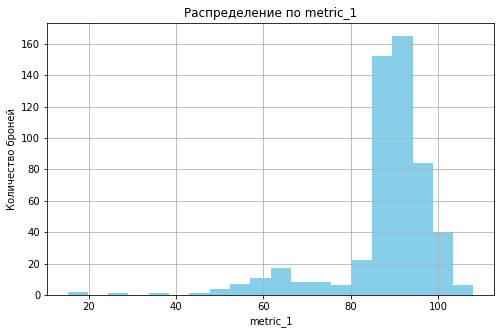

In [20]:
#построим диаграмму распределения для metric_1
plt.figure(figsize=(8, 5))
chosen['metric_1'].hist(bins=20, color='skyblue')
plt.title('Распределение по metric_1')
plt.xlabel('metric_1')
plt.ylabel('Количество броней')
plt.grid(True)
plt.show()

Большая часть выбранных терапевтов имеет metric_1 от 85 до 100

In [21]:
print(chosen['metric_2'].unique())

[1.     2.5    3.25   4.     2.25   2.     1.75   1.6667 1.5    3.
 0.75   0.6667 0.3333 0.5    1.25   2.6667]


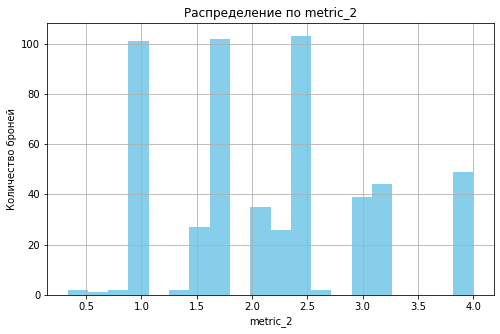

In [23]:
#построим диаграмму распределения для metric_2
plt.figure(figsize=(8, 5))
chosen['metric_2'].hist(bins=20, color='skyblue')
plt.title('Распределение по metric_2')
plt.xlabel('metric_2')
plt.ylabel('Количество броней')
plt.grid(True)
plt.show()

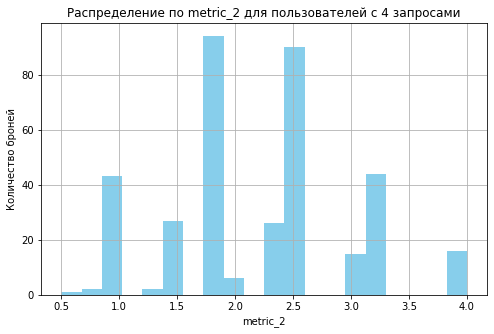

In [24]:
#построим диаграмму распределения для metric_score для пользователей с 4 запросами
chosen_4=chosen[chosen['count_of_problems']==4]
plt.figure(figsize=(8, 5))
chosen_4['metric_2'].hist(bins=20, color='skyblue')
plt.title('Распределение по metric_2 для пользователей с 4 запросами')
plt.xlabel('metric_2')
plt.ylabel('Количество броней')
plt.grid(True)
plt.show()

❗️ **Психологов metric_2 4 выбирают значительно реше, чем с рейтингом 2, 2,5, 3 и даже 1.**

Посмотрим как распеределены брони по количеству запросов.

In [25]:
grp_c_probl=chosen.groupby('count_of_problems')['survey_result_id'].count().reset_index().rename(columns={'survey_result_id': 'bookings'}).sort_values(by='bookings', ascending=False)
display(grp_c_probl)

,count_of_problems,bookings
3,4,366
2,3,78
0,1,49
1,2,42


### Распределение бронирований по c4_value

In [26]:
chosen['c4_value'].unique()

array([0.5333, 0.6667, 0.5556, 0.0625, 0.35  , 0.4167, 0.3077, 0.875 ,
       0.3   , 0.8571, 0.2258, 0.45  , 0.6154, 0.2143, 0.8182, 0.4286,
       0.4333, 0.8333, 0.75  , 0.625 , 0.4545, 0.2821, 0.2857, 0.2353,
       0.6071, 0.4615, 0.3269, 0.2   , 0.3182, 0.3774, 0.4375, 0.3333,
       0.5238, 0.6   , 0.5714, 0.4444, 0.2778, 0.56  , 0.44  , 0.    ,
       0.5833, 0.5   , 0.3939, 0.7143, 0.5263, 0.4074, 0.4348, 0.1429,
       0.5741, 0.1   , 0.3529, 0.4   , 0.5455, 0.4118, 0.381 , 0.54  ,
       0.2759, 0.5185, 0.3636, 0.55  , 0.8889, 0.3824, 0.7273, 0.1818,
       0.375 , 0.5417, 0.2424, 0.3571, 0.9444, 0.5385, 0.3125, 0.2105,
       0.32  , 0.3226, 0.1333, 0.7778, 0.2609, 0.28  , 0.2917, 0.6364,
       0.6923, 0.5152, 0.325 , 0.4783, 0.25  , 0.2727, 0.3235, 0.3364,
       0.5862, 0.5294, 0.1169, 0.3958, 0.6875, 0.5111, 0.4194, 0.3929,
       0.1667, 0.425 , 0.5882, 0.7   , 0.2667, 0.4091, 0.5217, 0.4667,
       0.2449, 0.2308, 0.3878, 0.4643, 0.5806, 0.0882, 0.4211])

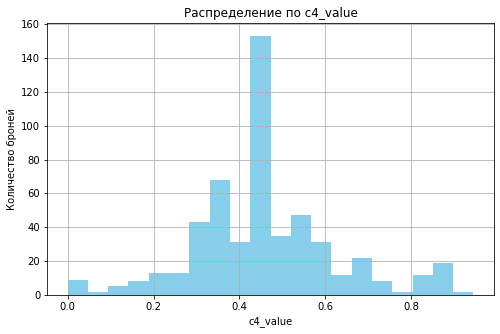

In [27]:
#построим диаграмму распределения для c4_value
plt.figure(figsize=(8, 5))
chosen['c4_value'].hist(bins=20, color='skyblue')
plt.title('Распределение по c4_value')
plt.xlabel('c4_value')
plt.ylabel('Количество броней')
plt.grid(True)
plt.show()

### Распределение бронирований в зависимости от величины показателей 1,2,3

#### Выбранные терапевты

In [28]:
#количество бронирований по показателю 1
grp_3days=chosen.groupby('feature_1')['survey_result_id'].count().reset_index().rename(columns={'survey_result_id': 'bookings'}).sort_values(by='bookings', ascending=False)
display(grp_3days)

,feature_1,bookings
0,0,154
1,1,60
2,2,59
3,3,51
4,4,43
5,5,39
6,6,27
8,8,27
7,7,22
9,9,19


In [29]:
avg_gap=chosen['gap'].median()
avg_gap

Timedelta('3 days 14:00:00')

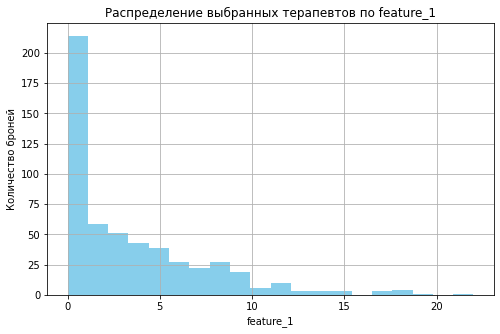

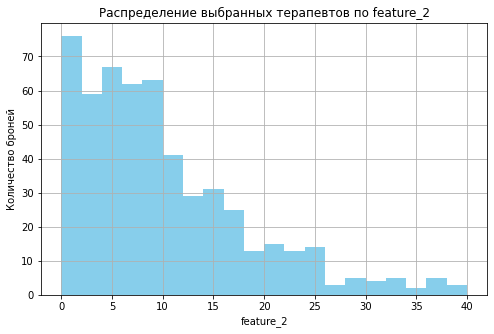

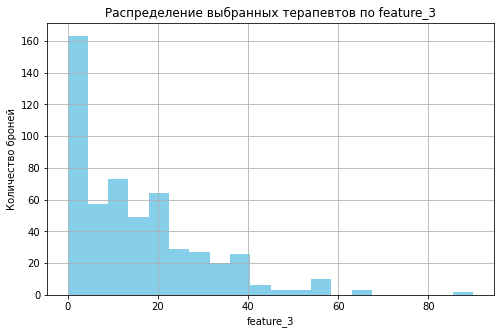

In [40]:
#построим диаграммы распределения для feature_1, feature_2, feature_3 у выбранных терапевтов
features = ['feature_1', 'feature_2', 'feature_3']

for feature in features:
    plt.figure(figsize=(8, 5))
    chosen[feature].hist(bins=20, color='skyblue')
    plt.title(f'Распределение выбранных терапевтов по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество броней')
    plt.grid(True)
    plt.show()

Большое количество бронирований происходит у психологов, у которых feature_1 меньше 5, feature_2 меньше 10, feature_3 меньше всех показателей влияет на выбор терапевтов.

Видно, что feature_2 все еще обратно-пропорционально количеству бронирований, но все-таки большая часть бронирований происходит у психологов с feature_2  4-7  от 2 до 15.

#### Терапевты в топ 12

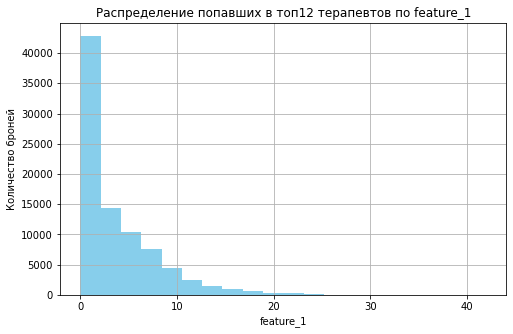

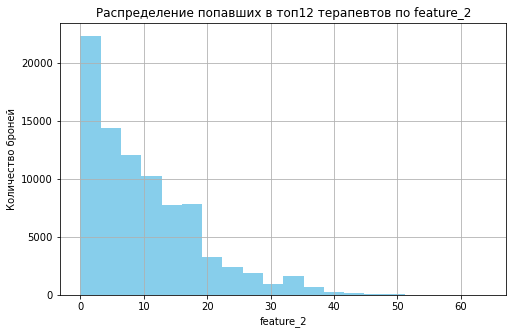

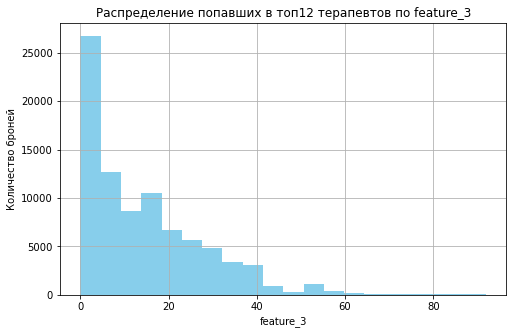

In [37]:

#построим диаграммы распределения для feature_1, feature_2, feature_3 для терапевтов в Топ 12

features = ['feature_1', 'feature_2', 'feature_3']

for feature in features:
    plt.figure(figsize=(8, 5))
    top12_final[feature].hist(bins=20, color='skyblue')
    plt.title(f'Распределение попавших в топ12 терапевтов по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество броней')
    plt.grid(True)
    plt.show()

Сравним распределения по свободным слотам всех терапевтов и выбранных

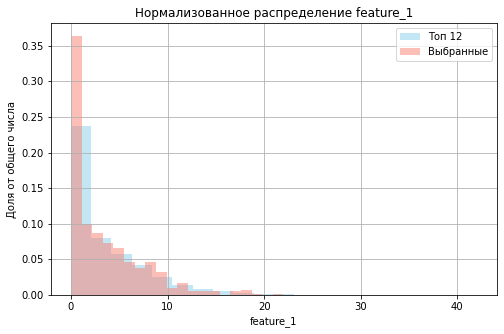

In [41]:
plt.figure(figsize=(8, 5))

plt.hist(top12_final['feature_1'], bins=20, alpha=0.5, label='Топ 12', color='skyblue', density=True)
plt.hist(chosen['feature_1'], bins=20, alpha=0.5, label='Выбранные', color='salmon', density=True)

plt.title('Нормализованное распределение feature_1')
plt.xlabel('feature_1')
plt.ylabel('Доля от общего числа')
plt.legend()
plt.grid(True)
plt.show()

Доля выбранных выше среди тех, у кого feature_1=0, далее доля выбранных становится ниже по мере увеличения feature_1.

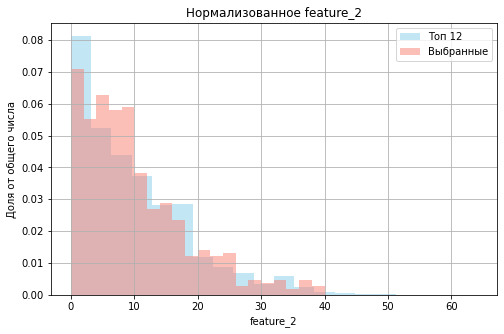

In [42]:
plt.figure(figsize=(8, 5))

plt.hist(top12_final['feature_2'], bins=20, alpha=0.5, label='Топ 12', color='skyblue', density=True)
plt.hist(chosen['feature_2'], bins=20, alpha=0.5, label='Выбранные', color='salmon', density=True)

plt.title('Нормализованное распределение feature_2')
plt.xlabel('feature_2')
plt.ylabel('Доля от общего числа')
plt.legend()
plt.grid(True)
plt.show()

Видно, что доля вsбранных больше среди тех, у кого feature_2 от 2 до 10, но ниже у тех, у кого было более 12.

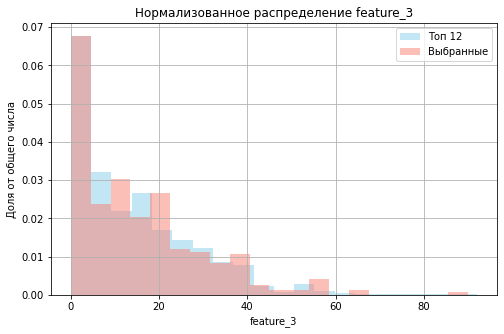

In [43]:
plt.figure(figsize=(8, 5))

plt.hist(top12_final['feature_3'], bins=20, alpha=0.5, label='Топ 12', color='skyblue', density=True)
plt.hist(chosen['feature_3'], bins=20, alpha=0.5, label='Выбранные', color='salmon', density=True)

plt.title('Нормализованное распределение feature_3')
plt.xlabel('feature_3')
plt.ylabel('Доля от общего числа')
plt.legend()
plt.grid(True)
plt.show()

Пользователи чаще выбирают терапевтов, у которых feature_3 меньше.

### Промежуток между сессией и датой бронирования

Посчитаем среднее и медианное время между выбором терапевта и первым визитом.

In [44]:
#избавимся от выбросов
chosen=chosen[chosen['gap']<=chosen['gap'].quantile(0.99)]

In [45]:
chosen['gap']=chosen['session_time']-chosen['survey_started']
avg=chosen['gap'].mean()
maximum=chosen['gap'].max()
minimal=chosen['gap'].min()
mediana=chosen['gap'].median()
print("Средняя разница:",avg,
      "Минимальная разница:",minimal,
     "Максимальная разница:", maximum,
     "Медиана разницы:", mediana)

Средняя разница: 4 days 09:55:13.610586011 Минимальная разница: 0 days 13:00:00 Максимальная разница: 16 days 10:00:00 Медиана разницы: 3 days 14:00:00


C:\Users\workp\AppData\Local\Temp/ipykernel_18328/88983727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen['gap']=chosen['session_time']-chosen['survey_started']


C:\Users\workp\AppData\Local\Temp/ipykernel_18328/3580270797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen['gap_days'] = chosen['gap'].dt.total_seconds() / (60 * 60 * 24)


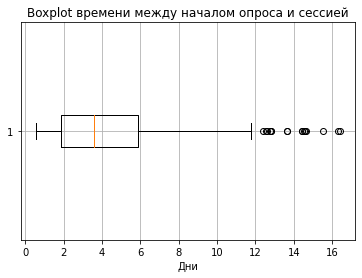

In [46]:

# Строим boxplot
# Переводим в дни
chosen['gap_days'] = chosen['gap'].dt.total_seconds() / (60 * 60 * 24)

# Строим boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(chosen['gap_days'].dropna(), vert=False)
plt.title('Boxplot времени между началом опроса и сессией')
plt.xlabel('Дни')
plt.grid(True)
plt.show()

Среднее и медианное значение промежутка между начала опроса и сессией отличаются не сильно. Составляют 3-4 дня.
Так как доступность выбранных терапевтов довольно низкая на таком промежудке. можем сделать вывод, что люди готовы подстроиться под время понравившегося специалиста и выбирают его вне зависимости от количества слотов.

Основная часть бронированиий происходит на даты - через 2-6 дней от момента выбора психолога, можно предположить, что наличие слотов в этот промежуток является наиболее важным.
Наличе слотов в день выбора и после 12 дней можно считать не важными.

Построим распределение бронирований по gap

C:\Users\workp\AppData\Local\Temp/ipykernel_18328/4084813026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen['gap_days']=chosen['gap']/np.timedelta64(1, 'D')


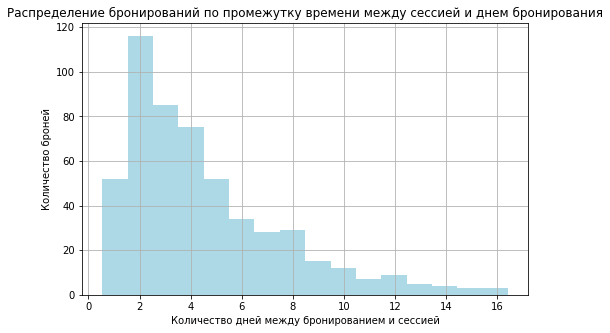

In [48]:
chosen['gap_days']=chosen['gap']/np.timedelta64(1, 'D')
plt.figure(figsize=(8, 5))
chosen['gap_days'].hist(bins=16, color='lightblue')
plt.title('Распределение бронирований по промежутку времени между сессией и днем бронирования')
plt.xlabel('Количество дней между бронированием и сессией')
plt.ylabel('Количество броней')
plt.grid(True)
plt.show()

C:\Users\workp\AppData\Local\Temp/ipykernel_18328/2794449228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_less3500['gap_days']=chosen_less3500['gap']/np.timedelta64(1, 'D')


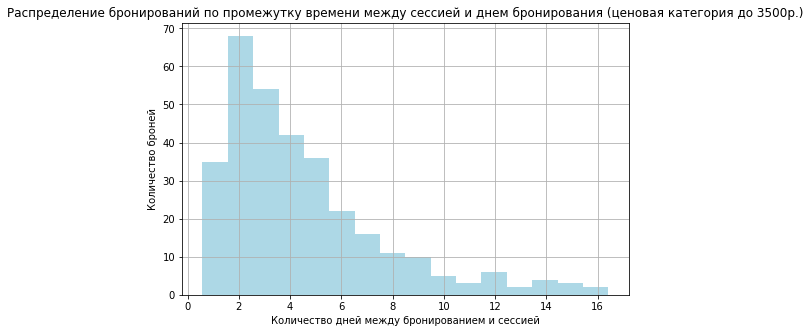

In [50]:
# посмотрим это же распределение для ценовой категории до 3500
chosen_less3500=chosen[chosen['price_category']=="До 3500 ₽"]
chosen_less3500['gap_days']=chosen_less3500['gap']/np.timedelta64(1, 'D')
plt.figure(figsize=(8, 5))
chosen_less3500['gap_days'].hist(bins=16, color='lightblue')
plt.title('Распределение бронирований по промежутку времени между сессией и днем бронирования (ценовая категория до 3500р.)')
plt.xlabel('Количество дней между бронированием и сессией')
plt.ylabel('Количество броней')
plt.grid(True)
plt.show()

C:\Users\workp\AppData\Local\Temp/ipykernel_18328/721665538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_more3500['gap_days']=chosen_more3500['gap']/np.timedelta64(1, 'D')


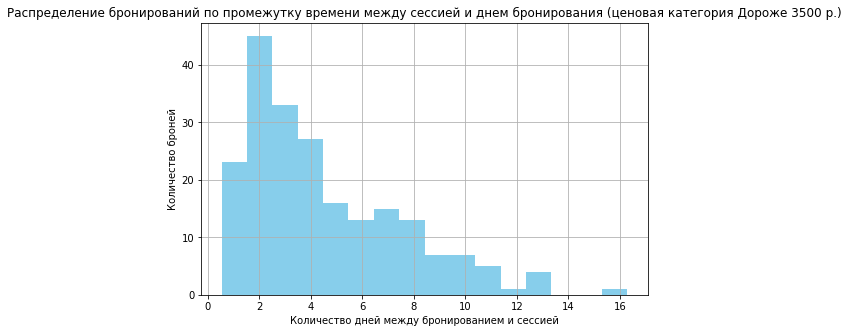

In [51]:
# посмотрим это же распределение для ценовой категории после 3500
chosen_more3500=chosen[chosen['price_category']!="До 3500 ₽"]
chosen_more3500['gap_days']=chosen_more3500['gap']/np.timedelta64(1, 'D')
plt.figure(figsize=(8, 5))
chosen_more3500['gap_days'].hist(bins=16, color='skyblue')
plt.title('Распределение бронирований по промежутку времени между сессией и днем бронирования (ценовая категория Дороже 3500 р.)')
plt.xlabel('Количество дней между бронированием и сессией')
plt.ylabel('Количество броней')
plt.grid(True)
plt.show()

В ценовой категории Выше 3500р. видим, что бронирований через 6-8 дней немного больше, чем у ценовой категории до 3500. Но значительных отличий нет.

In [53]:
chosen['gap_days_round']=chosen['gap_days'].round()
grp_gap_days=chosen.groupby('gap_days_round')['survey_result_id'].count().reset_index().rename(columns={'survey_result_id': 'bookings'}).sort_values(by='bookings', ascending=False)
grp_gap_days['share_bookings']=grp_gap_days['bookings']/grp_gap_days['bookings'].sum()*100
display(grp_gap_days)

C:\Users\workp\AppData\Local\Temp/ipykernel_18328/4129543381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen['gap_days_round']=chosen['gap_days'].round()


,gap_days_round,bookings,share_bookings
1,2.0,130,24.574669
3,4.0,82,15.500945
2,3.0,79,14.933837
4,5.0,48,9.073724
5,6.0,41,7.750473
0,1.0,37,6.994329
7,8.0,31,5.860113
6,7.0,25,4.725898
8,9.0,13,2.457467
9,10.0,13,2.457467


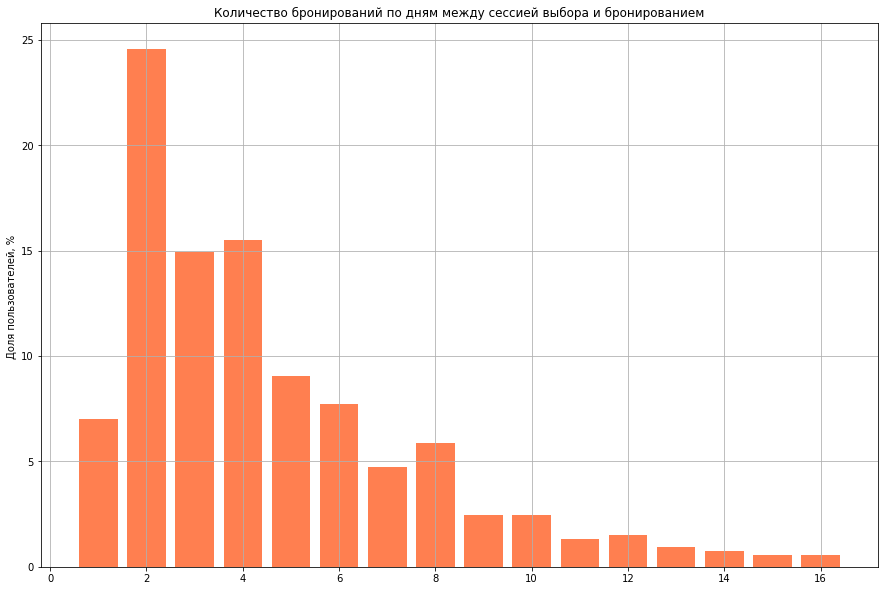

In [54]:
x = grp_gap_days['gap_days_round']
y = grp_gap_days['share_bookings']

plt.figure(figsize=(15, 10))

plt.bar(x, y,label ='', color='coral')


plt.xlabel("")
plt.ylabel("Доля пользователей, % ")

plt.title('Количество бронирований по дням между сессией выбора и бронированием')

plt.grid()
plt.show()

Около 25% пользователей назначают сессию с терапевтом в течение 2 дней после сессии выбора, бльшая часть броней происходит в течение 3-8 дней, больший промежуток встречается редко.

Посчитатаем медиану и среднее для feature_1 и feature_2

In [63]:
avg_3=chosen['feature_1'].mean()
avg_4_7=chosen['feature_2'].mean()
median_3=chosen['feature_1'].median()
median_4_7=chosen['feature_2'].median()

print(f"Среднее feature_1:{avg_3}")
print(f"Среднее feature_2:{avg_4_7}")
print(f"Медианное feature_1:{median_3}")
print(f"Медианное feature_2:{ median_4_7}")

Среднее feature_1:3.4725897920604916
Среднее feature_2:9.561436672967863
Медианное feature_1:2.0
Медианное feature_2:8.0


### Активность пользователей

Проанализируем:
* общее число пользователей по дням (DAU)
* общее число бронирований по дням


In [64]:
daily_metrics = orders.groupby('survey_started').agg(
    dau=('survey_result_id', 'nunique')
).reset_index()
daily_metrics['dow']=daily_metrics['survey_started'].dt.day_name()
daily_metrics

,survey_started,dau,dow
0,2025-06-16,345,Monday
1,2025-06-17,432,Tuesday
2,2025-06-18,349,Wednesday
3,2025-06-19,357,Thursday
4,2025-06-20,296,Friday
5,2025-06-21,265,Saturday
6,2025-06-22,328,Sunday
7,2025-06-23,401,Monday
8,2025-06-24,399,Tuesday
9,2025-06-25,345,Wednesday


По понедельникам и вторникам активность пользователей выше? Надо посмотреть на данных побольше

## Общие выводы и рекомендации

### Информация о данных

* Для анализа использовали данные о сессиях выбора терапевтов на платформе Альтер за период с 16.06.2025 по 26.06.2025. Для исследования используются только данные пользовтателей, которые ищут терапевта для личной терапии онлайн, так как они составляют наибольшее количество запросов.

* В ходе предобработки из данных были выделены еще 2 датасета:
  * chosen - выбранные психологи
  * top12_final - психологи, вошедшие в топ 12 по алгоритму 1
  
* В датасет добавили столбец: gap — с информацией о разнице между датой бронирования и датой сессии поиска клиента.

### Основные результаты анализа
**Общие выводы:** 

* Конверсия в бронирование из сессии отбора: 7,45 %
* Большинство бронирований происходит в ценовой категории до 3500р.
* Пользователи выбирают терапевтов metric_1 от 80 до 100, при этом metric_2 не значительно влияет на выбор

**Зависимость количества бронирований от feature_1, feature_2, feature_3:**

* feature_1: Большое количество бронирований происходит у психологов, у которых feature_1=0 или меньше 8
* feature_2: большая часть бронирований происходит у психологов с feature_2 от 2 до 15
* feature_3: много бронирований у терапевтом с  feature_3 0 , с увеличением feature_3 количество броней изменяется не значительно.

  В топ 12 попадают терапевты, у которых:
  * feature_1 <10 
  * feature_2 < 20 
  * feature_3< 40 
  
**Анализ промежутка между сессией выбора и временем бронирования (gap)**

* Средний gap: 4 days 07:30:09.056603773
* Минимальный gap: 0 days 13:00:00
* Максимальный gap: 15 days 12:00:00
* Медиана gap: 3 days 14:00:00

Среднее и медианное значение промежутка между начала опроса и сессией отличаются не сильно. Составляют 3-4 дня. Так как доступность выбранных терапевтов довольно низкая на таком промежутке, можем сделать вывод, что люди готовы подстроиться под время понравившегося специалиста и выбирают его вне зависимости от количества слотов.

Основная часть бронированиий происходит на даты - через 2-6 дней от момента выбора психолога, можно предположить, что наличие слотов в этот промежуток является наиболее важным. Наличе слотов в день выбора и после 12 дней можно считать не важными.

Около 25% бронирований совершаются на дату через 2 дня с даты проведения сессии (36-60 часов)



### Рекомендации

1. Не учитывать feature_3 в алгоритме выбора, так как выявлено его славбое влияние.
2. Снизить влияние metric_2.
3. Провести AB тестирование исправленного алгоритма.